# Week 4 Discussion: Logistic Regression with Gradient Descent

## Objectives

The focus of this week's discussion revolves around delving deeply into the process of training a logistic regression model using gradient descent. To initiate gradient descent, the initial step involves recognizing the gradient of the loss concerning the model parameters and proceeding in the opposite direction. Our approach begins with a thorough examination of the available dataset, followed by the development of a logistic regression class tailored for our dataset. This process encompasses:

* Reviewing the fundamentals of logistic regression
* Determining the loss function and computing the gradient accordingly
* Fitting the logistic regression model to the dataset
* Creating a toy dataset
* Visualizing the model's predictions through plotting.

## Sources

This discussion on impact of norms in linear regression is based on the following reference:
<br>
Probabilistic machine learning: an introduction by Kevin P. Murphy

## Binary Logistic Regression: A Review

Binary logistic regression assumes the following model:
<br>
<br>
$$
p(y|x, \theta) = Ber(y|\sigma(w^Tx)),
$$
where $x$ and $w$ are input and weight vectors, respectively, and $\sigma$, is the sigmoid function:
<br>
<br>
$$
\sigma(a) = \frac{1}{1+e^{-a}}.
$$

The loss, which is the (scaled) negative log likelihood, is given by:
<br>
<br>
$$
NLL(w) = -\frac{1}{N}log p(D|w) = -\frac{1}{N}log \prod_{n=1}^N Ber(y|\sigma(w^Tx)),
$$

which can be re-written as:
<br>
<br>
$$
NLL(w) = -\frac{1}{N} \sum_{n=1}^N [y_n log(\sigma(w^Tx)) + (1-y_n) log (1-\sigma(w^Tx))]
$$

After some calculations, the gradient of $NLL(w)$ with respect to $w$ can be obtained as:
<br>
<br>
$$
\nabla_w NLL(w) = \frac{1}{N} \sum_{n=1}^N (\sigma(w^Tx) - y_n) x_n
$$

If we consider $l^2$ regularization on weights, a $\frac{\lambda}{2}{\| w \|}_2^2$ term will be added to the $NLL(w)$ term which results in identifying the gradient as:
<br>
<br>
$$
\nabla_w NLL(w) = \frac{1}{N} \sum_{n=1}^N (\sigma(w^Tx) - y_n) x_n + \lambda w,
$$
note the extra $\lambda w$ at the end of the formulation.

In words, the gradient equals the average difference between the multiplication of each sample with "how much the model is wrong", i.e., the difference betweeen the predicted probability $\sigma(w^Tx)$ and the label $y_n$.

The gradient will then be employed iteratively within the gradient descent algorithm to adjust the weights towards their optimal values.

## Create a Logistic Regression Class

We'll introduce the four primary functions of the `LogisticRegression` class step by step and then combine them to create the class itself. These functions are:

* `__init__`: Initializes an instance of the class.
* `fit`: Fits the instance to the training data.
* `predict`: Utilizes the fitted instance to predict labels on the test dataset.
* `plot`: Creates a plot comparing the ground truth and predicted labels.

First let's begin by the initializer of the class.

In [2]:
import numpy as np
def __init__(self, D = 2, lr = 0.1, lambda_param = 0.1, max_iter = 1000):
    self.lr           = lr
    self.w            = np.random.randn(D + 1, 1) # default weights
    self.max_iter     = max_iter
    self.lambda_param = lambda_param

The `__init__()` function is designed to take four arguments:

* `D`: The dimensionality of the input data.

* `lr`: The learning rate governs the magnitude of the vector update during each iteration.

* `lambda_param`: The coefficient $lambda$ in the $\frac{\lambda}{2}{\| w \|}_2^2$ term to control the amount of regularization on weights.

* `n_iter`: This parameter signifies the number of iterations, determining how many times the algorithm will update the position of the point in its search for the minimum.

The initializer saves the entered values for later use and initializes the weights to random values stored in a `numpy` array. The dimensionality is set to $D+1$ since we're incorporating a bias term as well.

Now let's look at the fit function:

In [3]:
def fit(self, X, y):
    n          = X.shape[0]
    X_extended = np.concatenate([X, np.ones((n, 1))], axis=1) # ones are the intercept and x features

    for i in range(self.max_iter):
        preds   = 1/(1+np.exp(-np.matmul(X_extended, self.w)))
        grad    = ((preds - y) * X_extended).mean(axis=0, keepdims=True).T + self.lambda_param * self.w # numerical approx of negative grad
        self.w -= self.lr * grad
        if i % 100 == 0: # plot every 100 iterations
            self.iter = i
            self.plot(X, y, self.predict(X))

The `fit()` function is designed to take two arguments: the features $X$ and the labels $y$.

The function performs several steps in order:

It extends the input to have an extra column with a value of 1. This column corresponds to the extra dimension of the weight matrix which we built in the `__init__` function, resulting in `X_extended`.
In a for loop executed `self.max_iter` times:
* First, it plots the predictions at their initial state.
* Then, it computes the predictions of the model by multiplying `X_extended` with the weights and passing them through the sigmoid function.
* Then, it calculates the gradient `grad`, which is the mean of the difference between predictions and labels, as discussed, plus 
$\lambda w$.
* Finally, it updates the weights based on the negative of the gradients.
* At the end of the loop, it frequently plots the predictions compared to the ground truth using the `self.plot()` function.

The function `predict` is used for making predictions for test data:

In [4]:
def predict(self, X):
    X_extended = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)
    logits     = np.matmul(X_extended, self.w)
    return np.round(1/(1+np.exp(-logits)))

Finally, the plot function plots the ground truth and predicted labels side by side:

In [5]:
import matplotlib.pyplot as plt
def plot(self, X, y, preds = None):
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    ax_gt, ax_pred = ax

    ax_gt.scatter(X[:, 0], X[:, 1], c = y)
    ax_gt.set_title('GROUND TRUTH')
    ax_pred.scatter(X[:, 0], X[:, 1], c = preds)
    ax_pred.set_title('PREDS')
    fig.suptitle(f"ITERATION: {self.iter}", fontsize=30)
    plt.show()

Now we them all together to create the class:

In [33]:
from scipy.special import expit
class LogisticRegression:
  def __init__ (self, D = 2, lr = 0.1, lambda_param = 0.1, max_iter = 1000):
    self.lr           = lr
    self.w            = np.random.randn(D + 1, 1)
    self.max_iter     = max_iter
    self.lambda_param = lambda_param

  def fit(self, X, y):
    n          = X.shape[0]
    X_extended = np.concatenate([X, np.ones((n, 1))], axis=1)

    for i in range(self.max_iter):
      logits  = np.matmul(X_extended, self.w)
      grad    = ((expit(logits)-y) * X_extended).mean(axis=0, keepdims=True).T + 2 * self.lambda_param * self.w
      self.w -= self.lr * grad
      if i % 100 == 0:
        self.iter = i
        self.plot(X, y, self.predict(X))

  def predict(self, X):
    X_extended = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)
    logits     = np.matmul(X_extended, self.w)
    return np.round(expit(logits))


  def plot(self, X, y, preds = None):
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    ax_gt, ax_pred = ax

    ax_gt.scatter(X[:, 0], X[:, 1], c = y)
    ax_gt.set_title('GROUND TRUTH')
    ax_pred.scatter(X[:, 0], X[:, 1], c = preds)
    ax_pred.set_title('PREDS')
    fig.suptitle(f"ITERATION: {self.iter}", fontsize=30)
    plt.show()


## Create a Dataset

To create a simple dataset, we begin by generating a training dataset of $D$-dimensional points comprising $N$ samples. Here's the process:

We create the input features as a Gaussian random variable with mean 0 and covariance matrix ${x^2_{std}} I $ where $I$ is the identity matrix.
Next, we generate the labels by first adding a random noise to samples in $X$ and then transforming them through multiplication with the $W$ vector and adding the bias term $B$. If the resulting value is less than 0, we assign it as -1; otherwise, we assign it as +1 for our label.

In [20]:
np.random.seed(4)

N, D  = 10000, 2 # number of samples, dimension of the samples

x_std = 5
W, B  = np.array([[-10], [-5]]), 3
eps   = 20

X     = np.random.randn(N, D) * x_std
y     = (np.sign(np.matmul(X, W) + B + np.random.randn(N, 1) * eps)+1)/2
y

array([[0.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [0.]])

## Applying What We Built on the Dataset

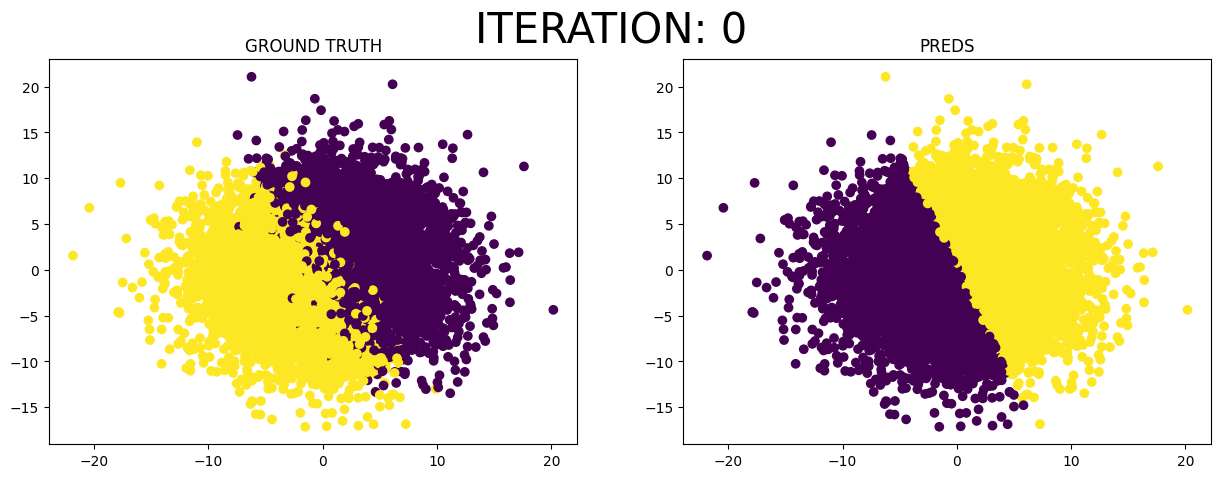

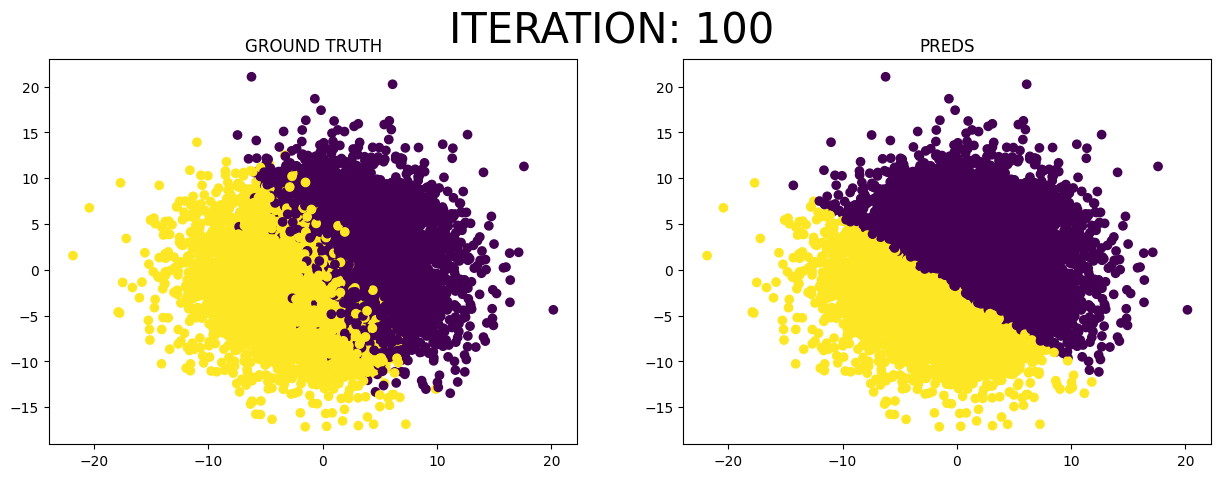

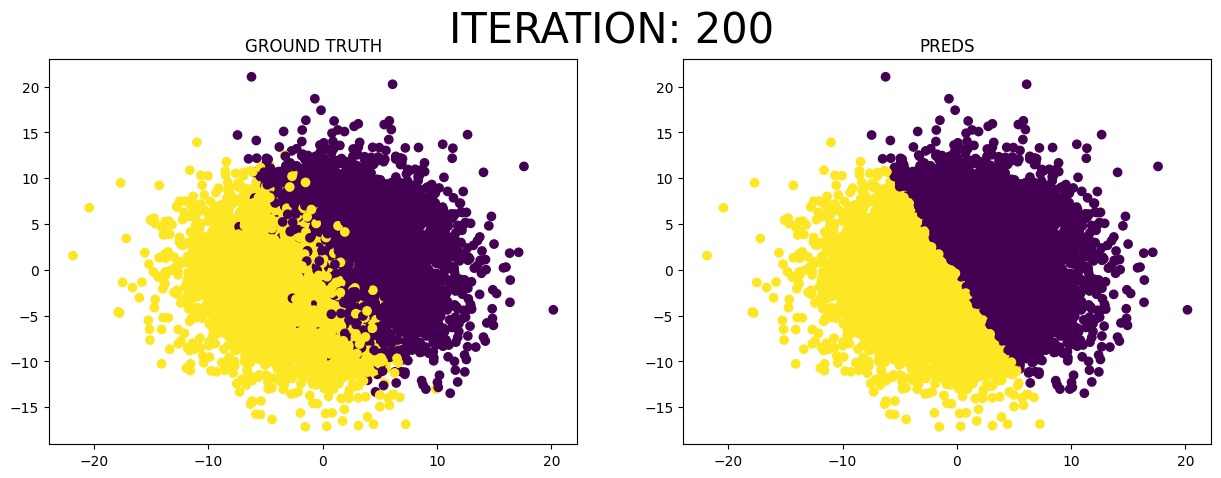

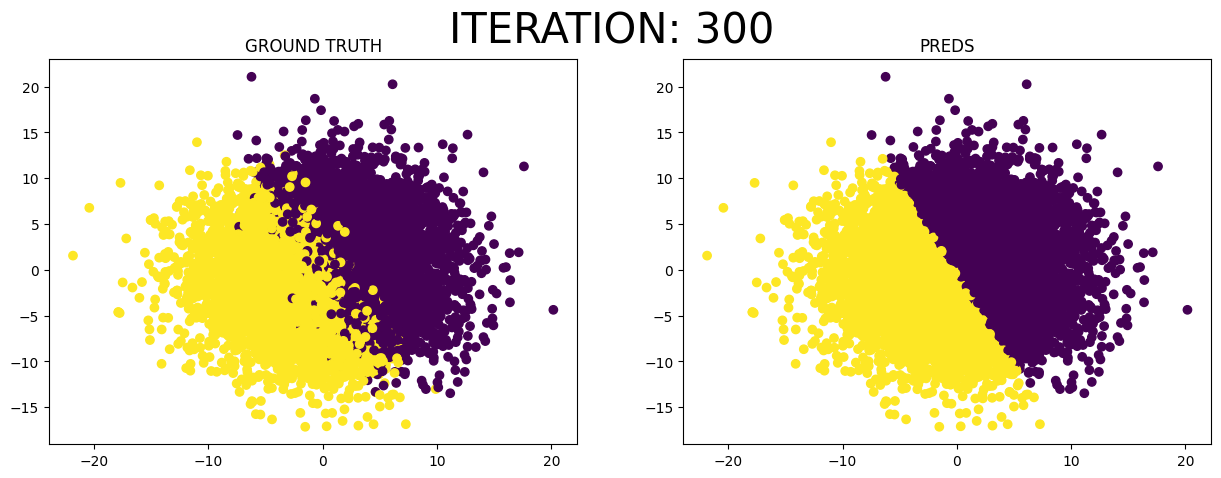

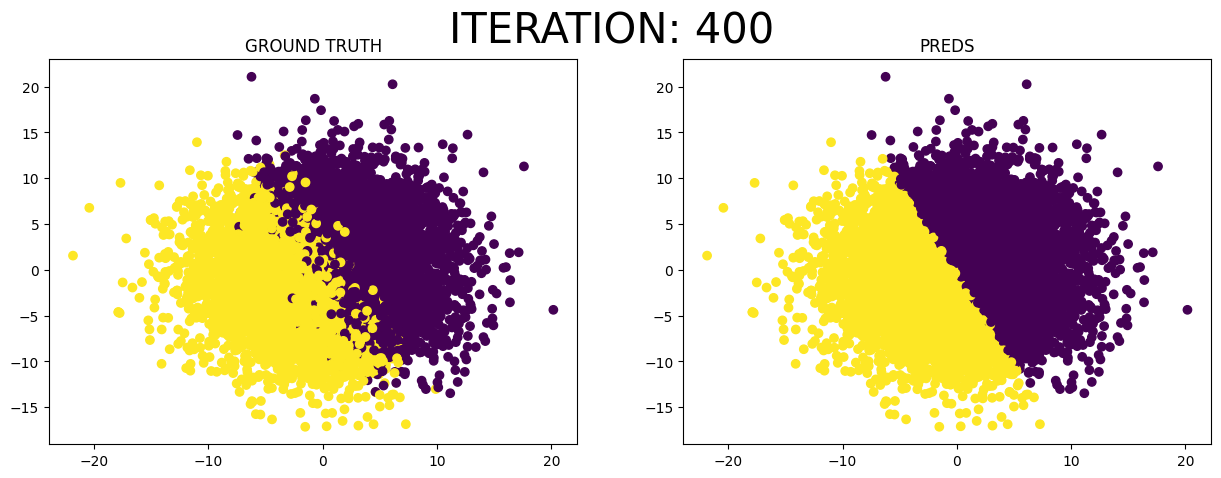

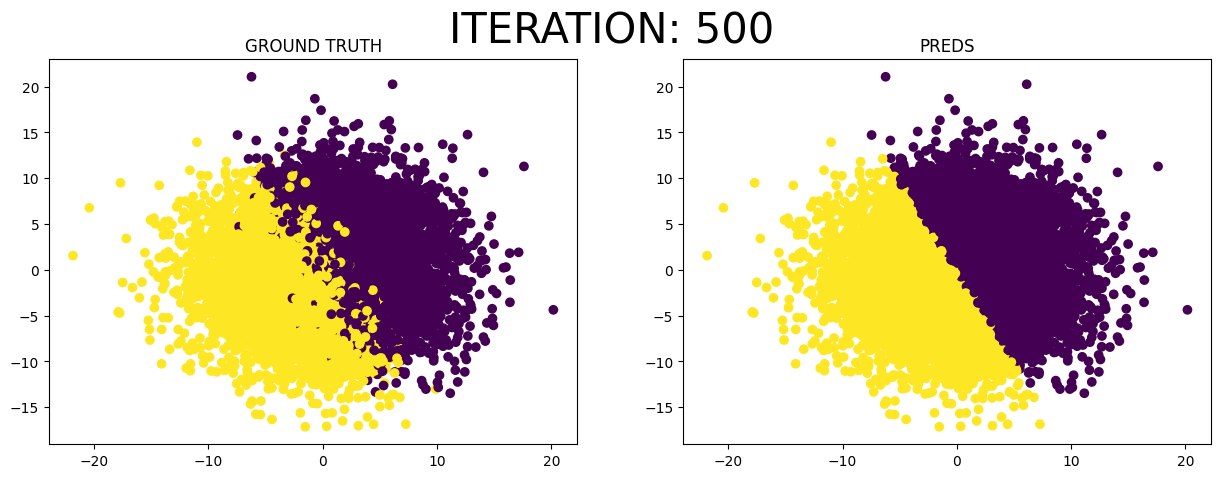

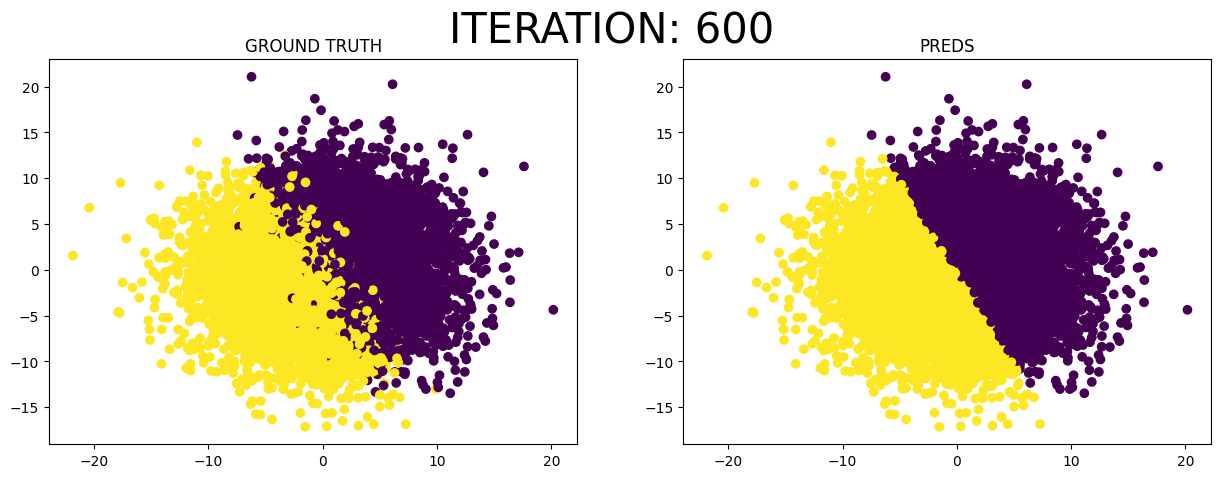

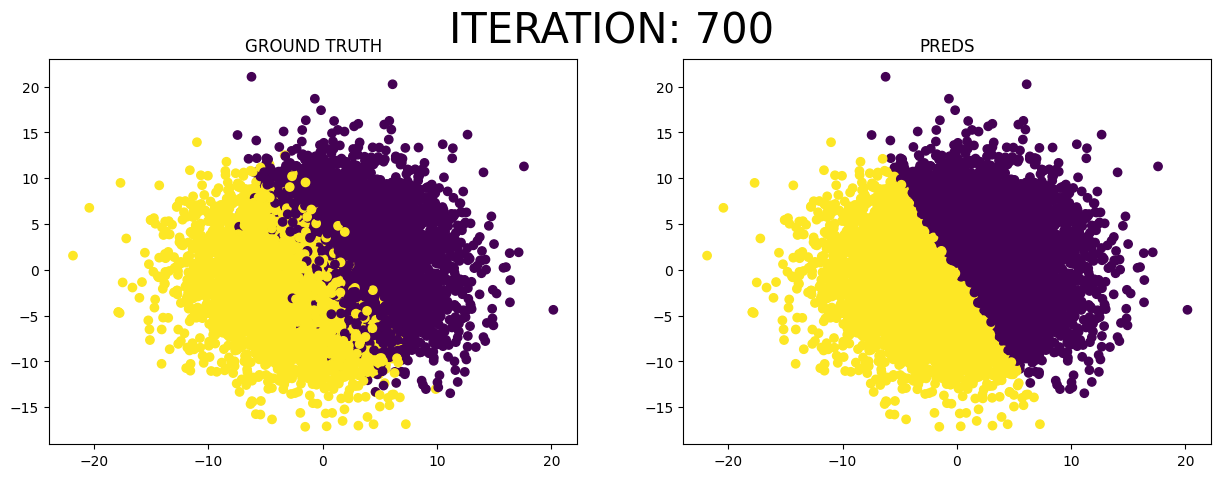

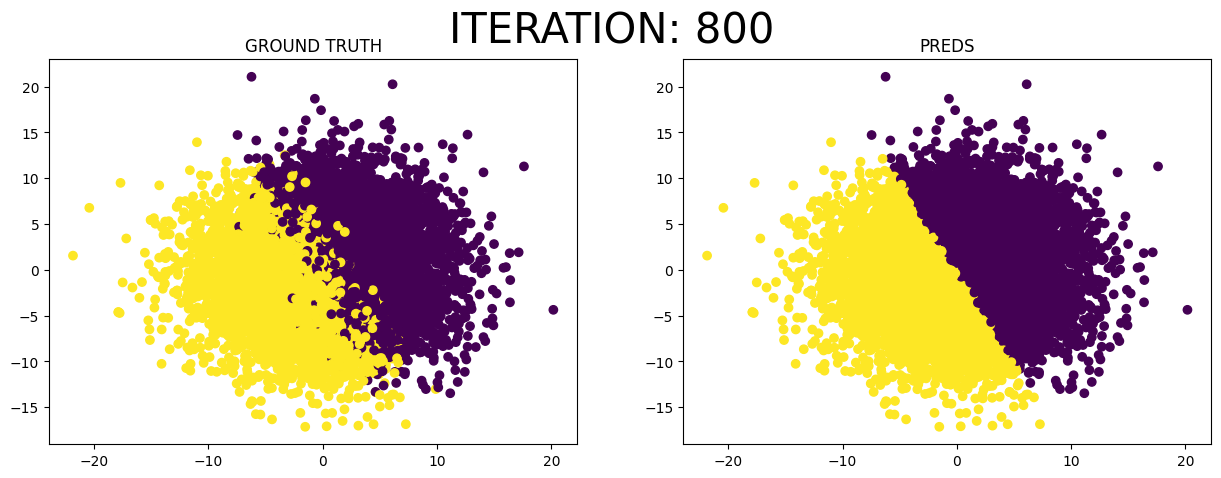

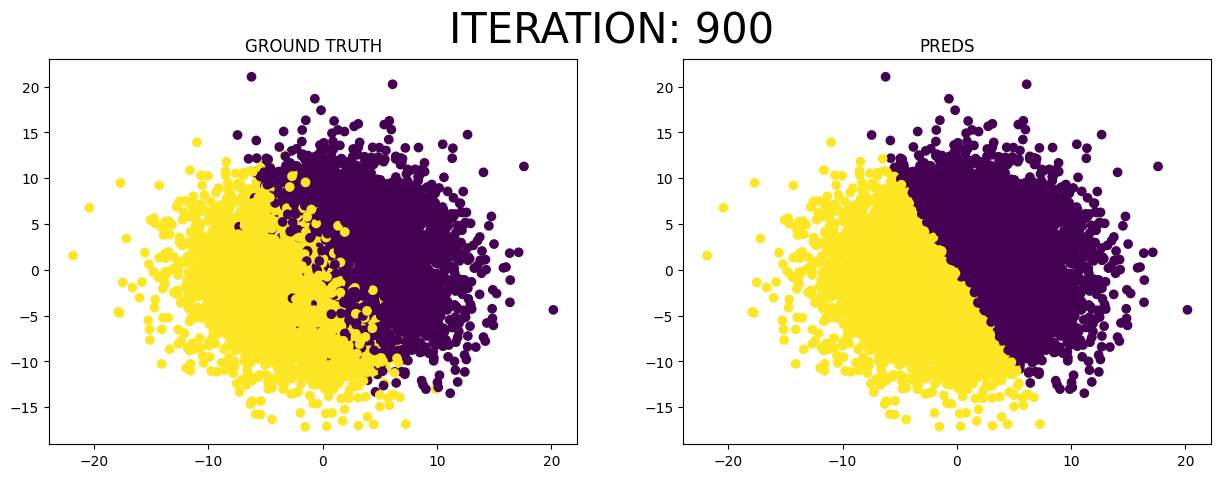

In [34]:
lr = LogisticRegression(lr = 0.005, lambda_param = 0, max_iter = 1000)
lr.fit(X, y)

## What We Have Learned

In this discussion, we learned the following:
* Reviewing the fundamentals of logistic regression
* Determining the loss function and computing the gradient accordingly
* Fitting the logistic regression model to the dataset
* Creating a toy dataset
* Visualizing the model's predictions through plotting

Hope you have enjoyed this lesson!